# <span style="color:darkblue"> Lecture 16: Classification Metrics </span>

<font size = "5">

In this lecture we will learn more about Support <br>
Vector Machines (SVM). We will start the class with a short video:

 https://www.youtube.com/watch?v=_YPScrckx28

 https://www.youtube.com/watch?v=Q7vT0--5VII

 <font size = "5">

 In this lecture we will emphasize:
 - A new method SVM
 - Importance of scaling data
 - How to obtain performance metrics
 - How to tune parameters

# <span style="color:darkblue"> I. Setup Working Environment </span>


<font size = "5">

We will be using the API of the University of California <br>
Irving Machine Learning Repository

In Windows (Anaconda Prompt) or Mac (Terminal) type:

``` pip install ucimlrepo ```

https://archive.ics.uci.edu

In [1]:
# Import the package for the University of California Irvine API
from ucimlrepo import fetch_ucirepo 

# Import SK-Learn library for machine learning functions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.metrics import get_scorer_names


# Import standard data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# <span style="color:darkblue"> II. Data </span>

<font size = "5">

Online Shoppers Purchasing Intention Dataset (OSHPID)

- This dataset contains information about user sessions
- It contains features data about user behavior 
while <br> navigating website
- The goal is to predict whether the customer will purchase or not

https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset


In [2]:
# Fetch online data from the UC Irvine Machine Learning Repository API
online_shopping= fetch_ucirepo(id=468) 

# Extract
X = online_shopping.data.features
# Drop columns that contain non-numeric values
X = X.drop(columns = ["Month","VisitorType"])

# Extract label data
y = online_shopping.data.targets["Revenue"]


<font size = "5">

Total size of dataset

In [3]:
# Compute total numbers or rows
print(len(y))
print(len(X))

12330
12330


<font size = "5">

Extract column names

- Check separately in VS-Code Data Viewer

In [4]:
dataset_names = pd.DataFrame(X.columns)

<font size = "5">

Obtain table of proportions for outcome

- 0 if the customer did not purchase product
- 1 if the customer purchase the product

In [5]:
# Compute frequency table for label
table_y = pd.crosstab(y,"Purchased ?") / len(y)
display(table_y)

col_0,Purchased ?
Revenue,
False,0.845255
True,0.154745


<font size = "5">

Obtain Basic Descriptive Statistics of features

In [6]:
# Compute table of descriptive statistics for features
display(X.describe())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<font size = "5">

Split into training and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

<font size = "5">

For many ML problems it is useful to scale the data

<font size = "3">

- Preprocessing ensures that the data has mean zero and unit variance
- A lot of things related to sc-learn use a function structure
    -  You start by defining a "scaler" function which computes <br>
    the mean and variance.
    - Then the "scaler" function is applied to the corresponding dataset
    - It is important to compute a separate scalar for the training <br>
    and test data to avoid "contaminating" the data

In [8]:
# The first step is to produce a "scaler" function
scaler_train = preprocessing.StandardScaler().fit(X_train)
scaler_test  = preprocessing.StandardScaler().fit(X_test)

# Apply scaler function
X_train_scale = scaler_train.transform(X_train)
X_test_scale  = scaler_test.transform(X_test)

# <span style="color:darkblue"> III. Support Vector Machinees (SVMs) </span>

<font size = "5">

One of the most popular methods of classifcation are SVMs


<font size = "5">

https://scikit-learn.org/stable/modules/svm.html#svm-classification
https://en.wikipedia.org/wiki/Support_vector_machine


<font size = "3">

- The default regularization parameter is $C = 1$
- The default kernel curvature parameter is  $gamma = 1/(\# features)$


In [9]:
svm = SVC()
svm.fit(X_train_scale, y_train)

SVC()

In [10]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
7645,4,23.533333,0,0.0,10,118.000000,0.011111,0.066667,0.000000,0.0,2,2,2,3,True
141,0,0.000000,0,0.0,9,272.500000,0.000000,0.011852,0.000000,0.2,1,1,6,3,False
6801,1,0.000000,0,0.0,1,74.600000,0.100000,0.100000,0.000000,0.0,3,2,1,4,False
367,1,11.888889,0,0.0,111,3510.879903,0.000098,0.009438,12.016565,0.0,3,2,5,2,False
5815,16,391.683333,0,0.0,24,443.750000,0.000000,0.006452,0.000000,0.0,2,10,7,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,9,103.933333,0,0.0,16,172.133333,0.012000,0.049000,0.000000,0.0,1,1,1,2,False
8846,0,0.000000,3,1830.5,81,5000.739116,0.003294,0.020433,0.000000,0.0,2,2,3,2,True
729,0,0.000000,0,0.0,15,1148.000000,0.014286,0.050000,0.000000,0.0,3,2,1,3,False
5825,2,15.200000,0,0.0,22,244.200000,0.027273,0.063636,0.000000,0.0,2,2,7,1,True


<font size = "5">

Out-of-sample predictions

In [28]:
predictions = svm.predict(X_test_scale)


<font size = "5">

Confusion Matrix with SK-Learn


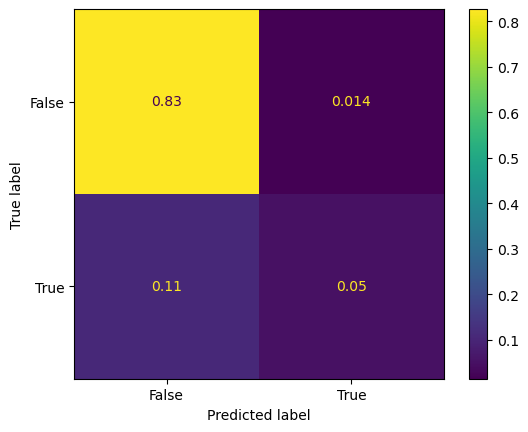

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions, labels=svm.classes_) / len(y_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)
disp.plot()
plt.show()

<font size = "5">

Try it yourself!

<font size = "3">

- What if you do not scale the features?
- Compute the confusion matrix for the SVM model without rescaling

Note:
- Often variables have very different scales
- Machine learning models such as SVM use notions of proximity 
- With heterogeneous variances, certain features will end up getting more
weight 
- Standardization helps puts the variables on equal footing

In [13]:
# Write your own code






# <span style="color:darkblue"> III. Performance and Decision Thresholds </span>

<font size = "5">

There are many possible performance metrics

(see textbook for more details)

In [14]:
list_scorers =  pd.DataFrame(get_scorer_names())
list_scorers

,0
0,accuracy
1,adjusted_mutual_info_score
2,adjusted_rand_score
3,average_precision
4,balanced_accuracy
5,completeness_score
6,explained_variance
7,f1
8,f1_macro
9,f1_micro


<font size = "5">

Obtain some of these metrics via cross-validation

- This usually takes a while to compute

In [15]:
# Scoring sets the variables that you want to compute

res = cross_validate(SVC(), X_train_scale, y_train,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=False, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,test_roc_auc,test_recall_macro
0,0.700482,0.559180,0.886486,0.846869,0.719641
1,0.697994,0.567473,0.892432,0.862550,0.721712
2,0.695478,0.579827,0.903191,0.854625,0.732961
3,0.782255,0.618301,0.898864,0.873532,0.725535
4,0.718253,0.608555,0.894538,0.826146,0.727303


<font size = "5">

Summarize results across folds

In [16]:
pd.DataFrame(res).mean()

fit_time             0.718892
score_time           0.586667
test_accuracy        0.895102
test_roc_auc         0.852745
test_recall_macro    0.725430
dtype: float64

<font size ="5">

Try it yourself!

Try obtaining other performance metrics
 

In [17]:
# Write your own code


# <span style="color:darkblue"> IV. Tuning by Cross Validation </span>


<font size = "5">

Manually create a grid of values for tuning

<font size = "3">

- Initially we will run this with a single training-test pair
- For computational ease we just try two parameters <br>
on the grid, but in a real application we may want more

In [18]:
k_features = X.shape[1]
k_features

15

In [19]:
k_features = X.shape[1]

best_score = 0

for gamma in [0.1/(k_features), 1/(k_features)]:   
    for C in [0.1, 1]:
        # Add a message to know the progress of the algorithm
        print("Evaluating - gamma: "+str(gamma)+"  - C: "+str(C))
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train_scale, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print(best_parameters)

Evaluating - gamma: 0.006666666666666667  - C: 0.1


/Users/asanc31/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Evaluating - gamma: 0.006666666666666667  - C: 1


/Users/asanc31/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Evaluating - gamma: 0.06666666666666667  - C: 0.1


/Users/asanc31/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Evaluating - gamma: 0.06666666666666667  - C: 1


/Users/asanc31/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


{'C': 0.1, 'gamma': 0.006666666666666667}


<font size = "5">

Estimate optimal model on all data

In [20]:

# rebuild a model on the combined training and validation set
# **best_parameters enters the dictionary format

svm = SVC(**best_parameters)
svm.fit(X_train_scale, y_train)

SVC(C=0.1, gamma=0.006666666666666667)

<font size ="5">

Obtain confusion matrix

/Users/asanc31/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


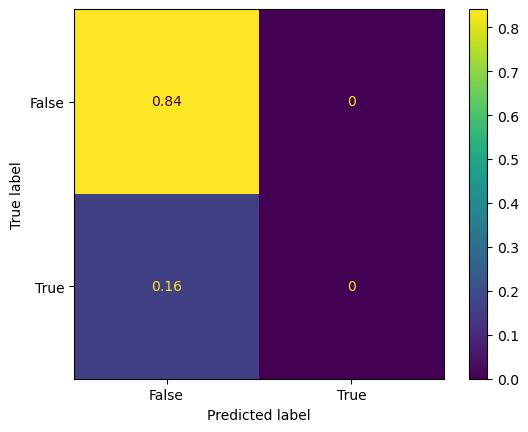

In [21]:
# Obtain predictions
predictions = svm.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions, labels=svm.classes_) / len(y_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)
disp.plot()
plt.show()

<font size = "5">

Create a grid of parameters

In [22]:
param_grid = {'C': [ 0.01, 0.1],
              'gamma': [0.01/(k_features), 0.1/(k_features)]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.01, 0.1], 'gamma': [0.0006666666666666666, 0.006666666666666667]}


<font size = "5">

Create configuration object for grid <br>
usng K-Fold cross-valdaton

- We set the number of folds "cv" to 2 for speed <br>
but in real applications you may want to have a larger <br>
number such as 5 so that the training set has more <br>
observations.

In [23]:
grid_search = GridSearchCV(SVC(), param_grid, cv=2,
                          return_train_score=True,
                          n_jobs = -1)

In [24]:
# Execute grd search

grid_search.fit(X_train_scale, y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1],
                         'gamma': [0.0006666666666666666,
                                   0.006666666666666667]},
             return_train_score=True)

<font size = "5">

Try it yourself!

- Create a grid for random forests on this dataset, <br>
varying the numbers of forests, i.e. the  argument <br>
```n_estimators``` in the random forest classifier.
- To keep the code from taking too long, <br>
try with 10 trees and 50 trees.

In [25]:
# Write your own code




